In [1]:
!pip install scipy


In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\hp\Downloads\movies.csv')

In [3]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# let's see if tehre is any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pt_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pt_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#basic Data Cleaning
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
# lets 1st drop NA Values from budget and gross
df.dropna(subset=["budget", "gross","rating"], inplace=True) 
df["budget"] = df["budget"].astype("int64") # convert float type into int64
df["gross"] = df["gross"].astype("int64")   # convert float type into int64


In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
#create correct year column
df["yearcorrect"]=df["released"].astype(str).str[:4]

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [10]:
#to sort values of gross columns
df_sortvalues= df.sort_values(by=["gross"],inplace=False,ascending=False)


In [11]:
pd.set_option("display.max_rows",None)

In [12]:
# drop any duplicates
df["comapny"]=df["company"].drop_duplicates().sort_values(ascending=False)

* Does Budget follows high correlation?
* Does Company gross earnings has  high Correlation?


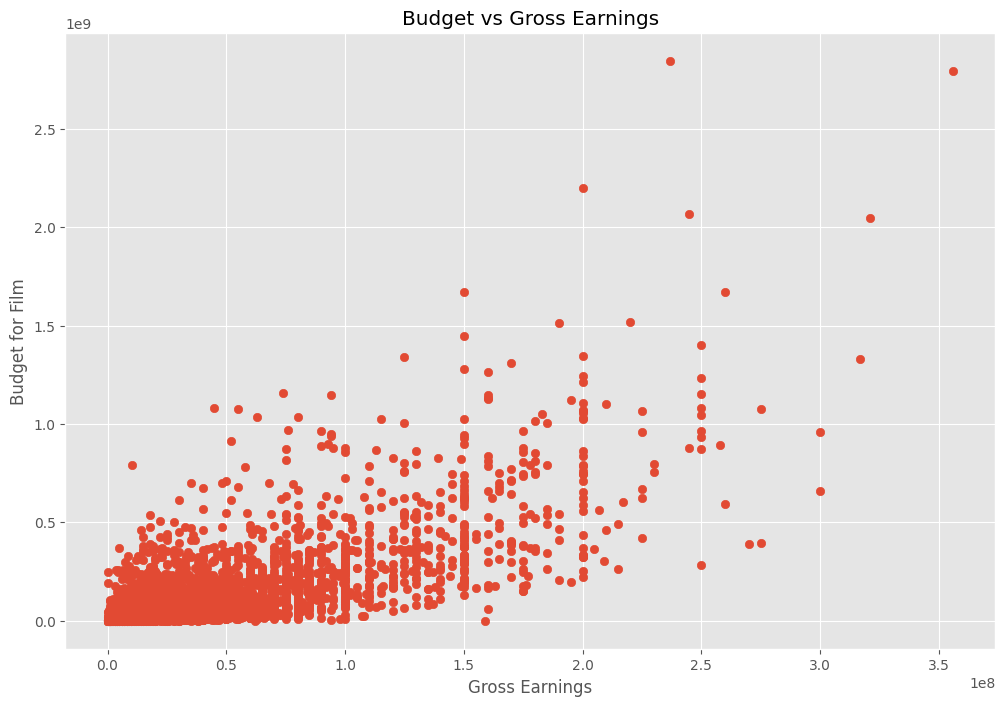

In [13]:
#Scatter plot with Budget vs Gross
plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Budget vs Gross Earnings")

plt.xlabel("Gross Earnings")

plt.ylabel("Budget for Film")

plt.show()


<Axes: xlabel='budget', ylabel='gross'>

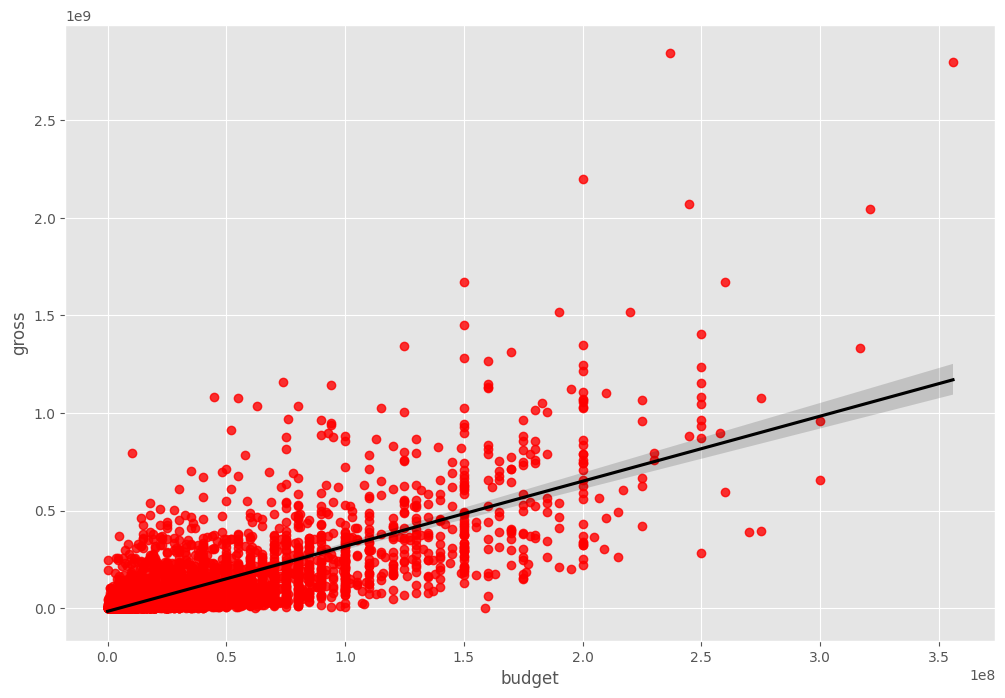

In [14]:
#Regression Plot buget vs gross using seaborn
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"},line_kws={"color":"black"})

* clearly depicted by above graph how gross and budget is related and have postive impact.

In [15]:
#Correlation 
df.corr(numeric_only=True, method="pearson")


,year,score,votes,budget,gross,runtime
year,1.000000,0.056506,0.206161,0.327961,0.274395,0.075173
score,0.056506,1.000000,0.474349,0.072155,0.222709,0.414145
votes,0.206161,0.474349,1.000000,0.439757,0.614808,0.352331
budget,0.327961,0.072155,0.439757,1.000000,0.740263,0.318718
gross,0.274395,0.222709,0.614808,0.740263,1.000000,0.275830
runtime,0.075173,0.414145,0.352331,0.318718,0.275830,1.000000


* high correlation between budget and gross

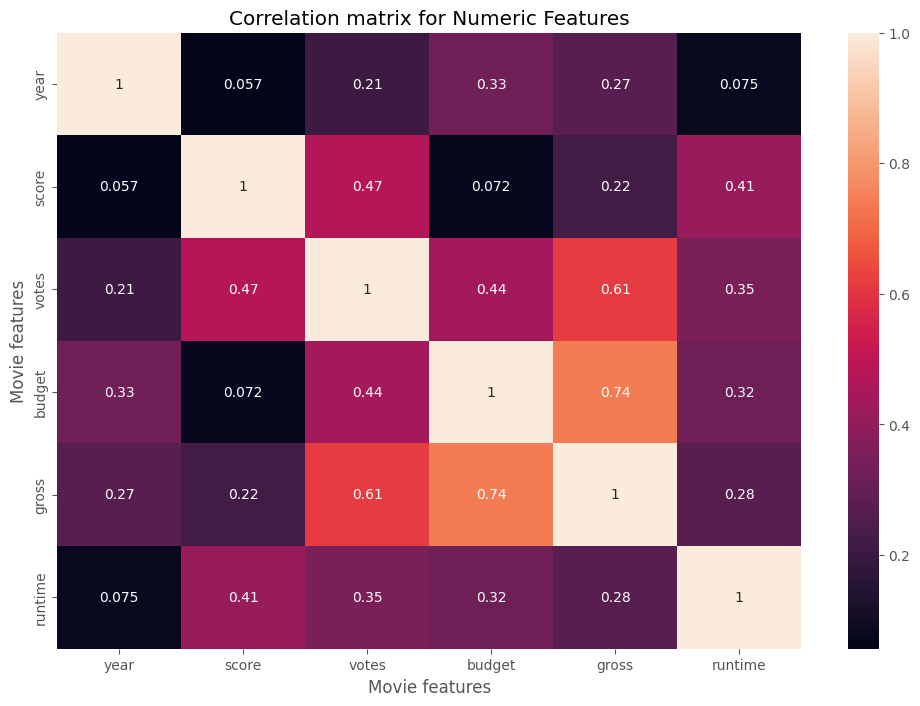

In [16]:
correlation_matrix = df.corr(numeric_only=True, method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")
plt.show()

* we can see from above visualization of correlation that gross and bbudget has high correlation.

In [17]:
# Numerize 
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=="object"):
        df_numerized[col_name]= df_numerized[col_name].astype("category")
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,comapny
0,4695,6,6,1980,1304,8.4,927000.0,1797,2834,699,46,19000000,46998772,1426,146.0,11,1426
1,3932,6,1,1980,1127,5.8,65000.0,1579,1159,214,47,4500000,58853106,452,104.0,10,452
2,3643,4,0,1980,1359,8.7,1200000.0,757,1819,1157,47,18000000,538375067,945,124.0,11,945
3,204,4,4,1980,1127,7.7,221000.0,889,1414,1474,47,3500000,83453539,1108,88.0,10,1108
4,732,6,4,1980,1170,7.3,108000.0,719,352,271,47,6000000,39846344,1083,98.0,10,1083


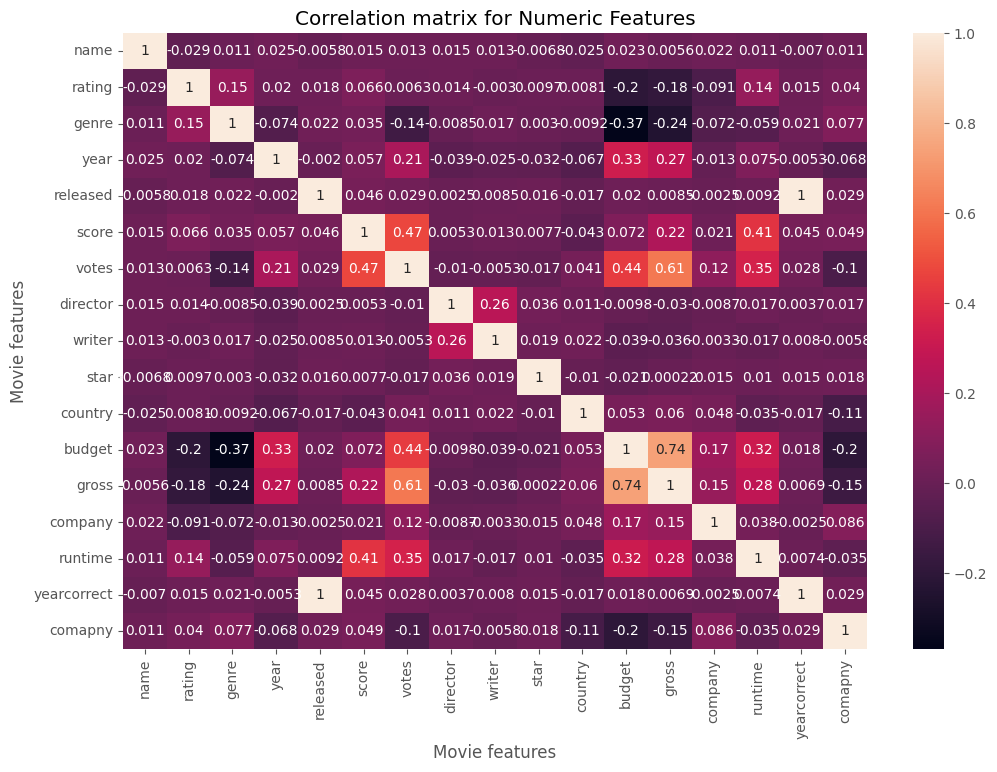

In [18]:
correlation_matrix = df_numerized.corr(numeric_only=True, method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")
plt.show()

In [19]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029271
             genre          0.010838
             year           0.025441
             released      -0.005783
             score          0.014521
             votes          0.012585
             director       0.015320
             writer         0.013143
             star          -0.006788
             country       -0.025467
             budget         0.023336
             gross          0.005613
             company        0.021592
             runtime        0.010949
             yearcorrect   -0.007006
             comapny        0.011339
rating       name          -0.029271
             rating         1.000000
             genre          0.147569
             year           0.020085
             released       0.018011
             score          0.066335
             votes          0.006321
             director       0.014381
             writer        -0.002966
             star           0.009693
 

In [20]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368521
budget       genre         -0.368521
gross        genre         -0.244034
genre        gross         -0.244034
budget       rating        -0.203531
rating       budget        -0.203531
comapny      budget        -0.197723
budget       comapny       -0.197723
gross        rating        -0.181590
rating       gross         -0.181590
comapny      gross         -0.147533
gross        comapny       -0.147533
genre        votes         -0.135954
votes        genre         -0.135954
comapny      country       -0.114877
country      comapny       -0.114877
votes        comapny       -0.099745
comapny      votes         -0.099745
company      rating        -0.091306
rating       company       -0.091306
genre        year          -0.073532
year         genre         -0.073532
genre        company       -0.071608
company      genre         -0.071608
comapny      year          -0.068291
year         comapny       -0.068291
             country       -0.066833
c

In [21]:
high_corr=sorted_pairs [(sorted_pairs)> 0.5]
high_corr

votes        gross          0.614808
gross        votes          0.614808
budget       gross          0.740263
gross        budget         0.740263
released     yearcorrect    0.996184
yearcorrect  released       0.996184
comapny      comapny        1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
yearcorrect  yearcorrect    1.000000
rating       rating         1.000000
name         name           1.000000
dtype: float64

* votes and budget have the highest correlation to gross earnings 
* company has low correlation 
